# **Machine Learning Project 3**
### Ensemble Learning

---


Diksha Jain, 045018

**Roll No.-045018, Section-H(BDA-04)**

In [ ]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Credit_Score_Data.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_11360\2339922847.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Credit_Score_Data.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
# Set the new roll number as the random seed
new_roll_number_seed = 45018

# Sample 5000 unique records using the new roll number as the seed
new_sampled_data = df.sample(n=5000, random_state=new_roll_number_seed)

# Stratified split of the data
new_train_set, new_test_set = train_test_split(new_sampled_data, test_size=0.2, stratify=new_sampled_data['Credit_Score'], random_state=new_roll_number_seed)

# Combine the training and testing sets into a single dataframe for export
data = pd.concat([new_train_set, new_test_set])

# Display the first few rows of the new dataframe
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
84221,0x2037b,CUS_0xee1,June,Dawsony,34,376-41-3395,Writer,17116.55,1722.379167,7,...,_,1342.04,38.284503,20 Years and 2 Months,Yes,56.715962,145.5977707,Low_spent_Small_value_payments,259.9241839,Standard
64534,0x19020,CUS_0xabc1,July,Rachelle Younglaik,18,963-46-6377,Media_Manager,952323,2739.737500,6,...,Standard,298.85,37.483288,29 Years and 11 Months,Yes,71.333636,190.1150748,High_spent_Small_value_payments,272.5250395,Good
21727,0x954d,CUS_0x424,August,Schnurry,22,180-42-9738,Architect,30758.43,NaN,4,...,Standard,471.15,29.941017,30 Years and 6 Months,Yes,24.403120,67.68511405,High_spent_Medium_value_payments,440.1320161,Standard
42035,0x10c4d,CUS_0x45bd,April,Katya Wachtelm,32,356-66-2055,Mechanic,80213.4,6919.450000,3,...,Good,792.61,33.259553,31 Years and 4 Months,No,200.350702,88.94556277,High_spent_Large_value_payments,642.6487355,Standard
20864,0x9042,CUS_0x79b8,January,Valetkevitchb,28,028-33-6202,Accountant,34392.44,NaN,9,...,_,2405.43_,32.520283,12 Years and 1 Months,Yes,80.043247,NaN,High_spent_Large_value_payments,397.7639358,Poor


In [ ]:
# Index Variable(s)
index_variables = data.index.names if data.index.names else None

# Variables or Features having Categories | Categorical Variables or Features (CV)
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()

# Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type
nominal_categorical_variables = [col for col in categorical_variables if data[col].nunique() > 2]

# Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type
ordinal_categorical_variables = [col for col in categorical_variables if data[col].nunique() <= 2]

# Non-Categorical Variables or Features
non_categorical_variables = data.select_dtypes(exclude=['object']).columns.tolist()

print("Index Variable(s):", index_variables if index_variables else "None")
print("Variables or Features having Categories | Categorical Variables or Features (CV):", categorical_variables)
print("Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type:", nominal_categorical_variables)
print("Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type:", ordinal_categorical_variables)
print("Non-Categorical Variables or Features:", non_categorical_variables)

Index Variable(s): [None]
Variables or Features having Categories | Categorical Variables or Features (CV): ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type: []
Non-Categorical Variables or Feat

In [ ]:
# Count | Frequency Statistics
categorical_count_stats = data.select_dtypes(include=['object']).apply(pd.Series.value_counts)

# Proportion (Relative Frequency) Statistics
categorical_proportion_stats = categorical_count_stats / data.shape[0]

# Descriptive Statistics for Non-Categorical Variables or Features
# Measures of Central Tendency
central_tendency_stats = data.describe()

# Measures of Dispersion
dispersion_stats = data.describe().loc[['std', 'min', 'max']]

# Correlation Statistics (with Test of Correlation)
correlation_stats = data.corr()

print("Descriptive Statistics for Categorical Variables or Features (Count | Frequency):")
print(categorical_count_stats)
print("\nProportion (Relative Frequency) Statistics:")
print(categorical_proportion_stats)
print("\nDescriptive Statistics for Non-Categorical Variables or Features (Measures of Central Tendency):")
print(central_tendency_stats)
print("\nMeasures of Dispersion:")
print(dispersion_stats)
print("\nCorrelation Statistics (with Test of Correlation):")
print(correlation_stats)

Descriptive Statistics for Categorical Variables or Features (Count | Frequency):
                    ID  Customer_ID  Month  Name  Age  SSN  Occupation  \
 Mattx             NaN          NaN    NaN   1.0  NaN  NaN         NaN   
"Eileenl           NaN          NaN    NaN   1.0  NaN  NaN         NaN   
"Eileenx           NaN          NaN    NaN   1.0  NaN  NaN         NaN   
"John OCallaghan"g NaN          NaN    NaN   1.0  NaN  NaN         NaN   
"John ODonnell"e   NaN          NaN    NaN   2.0  NaN  NaN         NaN   
...                 ..          ...    ...   ...  ...  ...         ...   
380.204118         NaN          NaN    NaN   NaN  NaN  NaN         NaN   
298.0008782        NaN          NaN    NaN   NaN  NaN  NaN         NaN   
269.9928369        NaN          NaN    NaN   NaN  NaN  NaN         NaN   
337.1378415        NaN          NaN    NaN   NaN  NaN  NaN         NaN   
Poor               NaN          NaN    NaN   NaN  NaN  NaN         NaN   

                    Annual_In

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_11360\1290480936.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_stats = data.corr()


In [ ]:
# Missing Data Statistics: Records
missing_records_stats = data.isnull().sum(axis=1).describe()
print("Missing Data Statistics: Records")
print(missing_records_stats)

# Missing Data Statistics: Categorical Variables
missing_categorical_stats = data.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Data Statistics: Categorical Variables")
print(missing_categorical_stats)

# Missing Data Statistics: Non-Categorical Variables
missing_non_categorical_stats = data.select_dtypes(exclude=['object']).isnull().sum()
print("\nMissing Data Statistics: Non-Categorical Variables")
print(missing_non_categorical_stats)

Missing Data Statistics: Records
count    5000.000000
mean        0.582600
std         0.724764
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
dtype: float64

Missing Data Statistics: Categorical Variables
ID                           0
Customer_ID                  0
Month                        0
Name                       456
Age                          0
SSN                          0
Occupation                   0
Annual_Income                0
Num_of_Loan                  0
Type_of_Loan               548
Num_of_Delayed_Payment     337
Changed_Credit_Limit         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_History_Age         440
Payment_of_Min_Amount        0
Amount_invested_monthly    219
Payment_Behaviour            0
Monthly_Balance             52
Credit_Score                 0
dtype: int64

Missing Data Statistics: Non-Categorical Variables
Monthly_Inhand_Salary       764
Num_Bank_Accounts  

In [ ]:
# Missing Data Treatment: Records
data_without_missing_records = data.dropna(thresh=data.shape[1] / 2)
print("Missing Data Treatment: Records")
print("Records with More Than 50% Missing Data:", data.shape[0] - data_without_missing_records.shape[0])

# Missing Data Treatment: Categorical Variables
missing_categorical_stats = data.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Data Treatment: Categorical Variables")
print("Variables with More Than 50% Missing Data:", missing_categorical_stats[missing_categorical_stats > data.shape[0] / 2].index.tolist())

# Missing Data Treatment: Non-Categorical Variables
missing_non_categorical_stats = data.select_dtypes(exclude=['object']).isnull().sum()
print("\nMissing Data Treatment: Non-Categorical Variables")
print("Variables with More Than 50% Missing Data:", missing_non_categorical_stats[missing_non_categorical_stats > data.shape[0] / 2].index.tolist())

Missing Data Treatment: Records
Records with More Than 50% Missing Data: 0

Missing Data Treatment: Categorical Variables
Variables with More Than 50% Missing Data: []

Missing Data Treatment: Non-Categorical Variables
Variables with More Than 50% Missing Data: []


In [ ]:
# Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables
data_imputed_categorical_mode = data.copy().fillna(data.mode().iloc[0])
print("Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables")
print(data_imputed_categorical_mode.head())

Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables
            ID Customer_ID    Month                Name Age          SSN  \
84221  0x2037b   CUS_0xee1     June             Dawsony  34  376-41-3395   
64534  0x19020  CUS_0xabc1     July  Rachelle Younglaik  18  963-46-6377   
21727   0x954d   CUS_0x424   August            Schnurry  22  180-42-9738   
42035  0x10c4d  CUS_0x45bd    April      Katya Wachtelm  32  356-66-2055   
20864   0x9042  CUS_0x79b8  January       Valetkevitchb  28  028-33-6202   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
84221         Writer      17116.55            1722.379167                  7   
64534  Media_Manager        952323            2739.737500                  6   
21727      Architect      30758.43            1498.348750                  4   
42035       Mechanic       80213.4            6919.450000                  3   
20864     Accountant      34392.44            1498.3487

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_11360\2148784879.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  data_imputed_categorical_mode = data.copy().fillna(data.mode().iloc[0])


In [ ]:
# Imputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables
data_imputed_non_categorical_mean = data.copy().fillna(data.mean())
print("\nImputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables")
print(data_imputed_non_categorical_mean.head())


Imputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables
            ID Customer_ID    Month                Name Age          SSN  \
84221  0x2037b   CUS_0xee1     June             Dawsony  34  376-41-3395   
64534  0x19020  CUS_0xabc1     July  Rachelle Younglaik  18  963-46-6377   
21727   0x954d   CUS_0x424   August            Schnurry  22  180-42-9738   
42035  0x10c4d  CUS_0x45bd    April      Katya Wachtelm  32  356-66-2055   
20864   0x9042  CUS_0x79b8  January       Valetkevitchb  28  028-33-6202   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
84221         Writer      17116.55            1722.379167                  7   
64534  Media_Manager        952323            2739.737500                  6   
21727      Architect      30758.43            4097.438372                  4   
42035       Mechanic       80213.4            6919.450000                  3   
20864     Accountant      34392.44            4097

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_11360\2995041473.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed_non_categorical_mean = data.copy().fillna(data.mean())


In [ ]:
# Imputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables
data_imputed_non_categorical_median = data.copy().fillna(data.median())
print("\nImputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables")
print(data_imputed_non_categorical_median.head())


Imputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables
            ID Customer_ID    Month                Name Age          SSN  \
84221  0x2037b   CUS_0xee1     June             Dawsony  34  376-41-3395   
64534  0x19020  CUS_0xabc1     July  Rachelle Younglaik  18  963-46-6377   
21727   0x954d   CUS_0x424   August            Schnurry  22  180-42-9738   
42035  0x10c4d  CUS_0x45bd    April      Katya Wachtelm  32  356-66-2055   
20864   0x9042  CUS_0x79b8  January       Valetkevitchb  28  028-33-6202   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
84221         Writer      17116.55            1722.379167                  7   
64534  Media_Manager        952323            2739.737500                  6   
21727      Architect      30758.43            3034.737084                  4   
42035       Mechanic       80213.4            6919.450000                  3   
20864     Accountant      34392.44            30

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_11360\3401952034.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed_non_categorical_median = data.copy().fillna(data.median())


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Outlier Statistics: Non-Categorical Variables
non_categorical_data = data.select_dtypes(exclude=['object'])
Q1 = non_categorical_data.quantile(0.25)
Q3 = non_categorical_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((non_categorical_data < lower_bound) | (non_categorical_data > upper_bound)).sum()

print("Outlier Statistics: Non-Categorical Variables")
print(outliers)

Outlier Statistics: Non-Categorical Variables
Monthly_Inhand_Salary        80
Num_Bank_Accounts            60
Num_Credit_Card              92
Interest_Rate               123
Delay_from_due_date         169
Num_Credit_Inquiries         73
Credit_Utilization_Ratio      0
Total_EMI_per_month         323
dtype: int64


In [ ]:
# Outlier Treatment: Non-Categorical Variables
for col in non_categorical_data.columns:
    non_categorical_data[col] = np.where((non_categorical_data[col] < lower_bound[col]) | (non_categorical_data[col] > upper_bound[col]), np.nan, non_categorical_data[col])

# Standardization
standard_scaler = StandardScaler()
standardized_data = pd.DataFrame(standard_scaler.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
print("\nStandardized Data:")
print(standardized_data.head())


Standardized Data:
   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0              -0.774110           0.606851         1.182734       0.246927   
1              -0.414791           0.224668        -0.252928      -0.309931   
2                    NaN          -0.539698        -0.252928      -0.755418   
3               1.061436          -0.921880        -1.210036      -0.755418   
4                    NaN           1.371216         0.225626            NaN   

   Delay_from_due_date  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0             0.421119              2.099223                  1.177557   
1             0.273755             -1.520736                  1.021962   
2            -0.315698              0.030675                 -0.442734   
3            -0.094653             -0.745031                  0.201720   
4             0.936890              1.064949                  0.058155   

   Total_EMI_per_month  
0            -0.418847  
1         

In [ ]:
# Normalization using Min-Max Scaler
min_max_scaler = MinMaxScaler()
normalized_data = pd.DataFrame(min_max_scaler.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
print("\nNormalized Data:")
print(normalized_data.head())

# Log Transformation
log_transformed_data = np.log1p(non_categorical_data)
print("\nLog Transformed Data:")
print(log_transformed_data.head())


Normalized Data:
   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0               0.114048           0.666667         0.727273       0.484848   
1               0.199741           0.583333         0.454545       0.333333   
2                    NaN           0.416667         0.454545       0.212121   
3               0.551800           0.333333         0.272727       0.212121   
4                    NaN           0.833333         0.545455            NaN   

   Delay_from_due_date  Num_Credit_Inquiries  Credit_Utilization_Ratio  \
0             0.500000              0.823529                  0.632565   
1             0.467742              0.000000                  0.602850   
2             0.338710              0.352941                  0.323126   
3             0.387097              0.176471                  0.446202   
4             0.612903              0.588235                  0.418784   

   Total_EMI_per_month  
0             0.156943  
1           

C:\Users\WELCOME\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
C:\Users\WELCOME\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WELCOME\anaconda3\lib\site-packages\skl

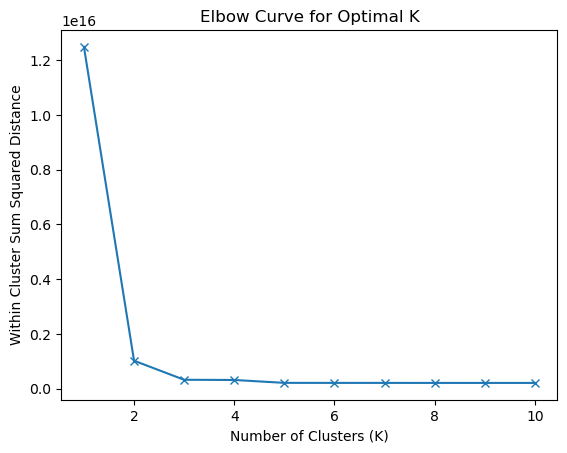

In [ ]:
# Function to clean numerical columns
def clean_numeric_column(column):
    if pd.api.types.is_numeric_dtype(column):
        return column
    else:
        return pd.to_numeric(column.str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

# Clean the selected features
data['Annual_Income'] = clean_numeric_column(data['Annual_Income'])
data['Credit_Utilization_Ratio'] = clean_numeric_column(data['Credit_Utilization_Ratio'])
data['Total_EMI_per_month'] = clean_numeric_column(data['Total_EMI_per_month'])

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize an empty list to store the within-cluster sum squared distance
wcssd = []  # Within-Cluster-Sum-Squared-Distance

# Define the range of clusters to try
nr_clus = range(1, 11)  # Number of Clusters

# Loop through each value of K
for k in nr_clus:
    kmeans = KMeans(n_clusters=k, init='random', random_state=111)
    kmeans.fit(data_filled)  # Fit KMeans on the dataset with filled missing values
    wcssd.append(kmeans.inertia_)  # Append the within-cluster sum squared distance to the list

# Plot the Elbow Curve
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with 2 clusters
km_2cluster = KMeans(n_clusters=2, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for your dataset
km_2cluster_model = km_2cluster.fit_predict(data_filled)

# Print or use km_2cluster_model as needed
print(km_2cluster_model)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 0 1]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with 2 clusters
km_2cluster = KMeans(n_clusters=2, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for the entire dataset
cluster_labels_km_2cluster = km_2cluster.fit_predict(data_filled)

# Calculate the silhouette score for KMeans clustering with 2 clusters
sscore_km_2cluster = silhouette_score(data_filled, cluster_labels_km_2cluster)
print("Silhouette Score for KMeans with 2 clusters:", sscore_km_2cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 2 clusters
dbscore_km_2cluster = davies_bouldin_score(data_filled, cluster_labels_km_2cluster)
print("Davies-Bouldin Score for KMeans with 2 clusters:", dbscore_km_2cluster)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for KMeans with 2 clusters: 0.9936504592513126
Davies-Bouldin Score for KMeans with 2 clusters: 0.18561987840263217


In [ ]:
from sklearn.cluster import KMeans

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with 3 clusters
km_3cluster = KMeans(n_clusters=3, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for your dataset
km_3cluster_model = km_3cluster.fit_predict(data_filled)

# Print or use km_3cluster_model as needed
print(km_3cluster_model)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 0 1]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with 3 clusters
km_3cluster = KMeans(n_clusters=3, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for the entire dataset
cluster_labels_km_3cluster = km_3cluster.fit_predict(data_filled)

# Calculate the silhouette score for KMeans clustering with 3 clusters
sscore_km_3cluster = silhouette_score(data_filled, cluster_labels_km_3cluster)
print("Silhouette Score for KMeans with 3 clusters:", sscore_km_3cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 3 clusters
dbscore_km_3cluster = davies_bouldin_score(data_filled, cluster_labels_km_3cluster)
print("Davies-Bouldin Score for KMeans with 3 clusters:", dbscore_km_3cluster)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for KMeans with 3 clusters: 0.9915639707905886
Davies-Bouldin Score for KMeans with 3 clusters: 0.3578554560842447


In [ ]:
from sklearn.cluster import KMeans

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with 4 clusters
km_4cluster = KMeans(n_clusters=4, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for your dataset
km_4cluster_model = km_4cluster.fit_predict(data_filled)

# Print or use km_4cluster_model as needed
print(km_4cluster_model)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 3 ... 3 2 3]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with 4 clusters
km_4cluster = KMeans(n_clusters=4, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for the entire dataset
cluster_labels_km_4cluster = km_4cluster.fit_predict(data_filled)

# Calculate the silhouette score for KMeans clustering with 4 clusters
sscore_km_4cluster = silhouette_score(data_filled, cluster_labels_km_4cluster)
print("Silhouette Score for KMeans with 4 clusters:", sscore_km_4cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 4 clusters
dbscore_km_4cluster = davies_bouldin_score(data_filled, cluster_labels_km_4cluster)
print("Davies-Bouldin Score for KMeans with 4 clusters:", dbscore_km_4cluster)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for KMeans with 4 clusters: 0.6724213375986382
Davies-Bouldin Score for KMeans with 4 clusters: 0.5403826197629933


In [ ]:
from sklearn.cluster import KMeans

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with 5 clusters
km_5cluster = KMeans(n_clusters=5, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for your dataset
km_5cluster_model = km_5cluster.fit_predict(data_filled)

# Print or use km_5cluster_model as needed
print(km_5cluster_model)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 4 2 ... 4 1 2]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Selecting a subset of features from your dataset for clustering
features = ['Annual_Income', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Initialize KMeans with 5 clusters
km_5cluster = KMeans(n_clusters=5, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for the entire dataset
cluster_labels_km_5cluster = km_5cluster.fit_predict(data_filled)

# Calculate the silhouette score for KMeans clustering with 5 clusters
sscore_km_5cluster = silhouette_score(data_filled, cluster_labels_km_5cluster)
print("Silhouette Score for KMeans with 5 clusters:", sscore_km_5cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 5 clusters
dbscore_km_5cluster = davies_bouldin_score(data_filled, cluster_labels_km_5cluster)
print("Davies-Bouldin Score for KMeans with 5 clusters:", dbscore_km_5cluster)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for KMeans with 5 clusters: 0.6400325455564746
Davies-Bouldin Score for KMeans with 5 clusters: 0.49774952802277445


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


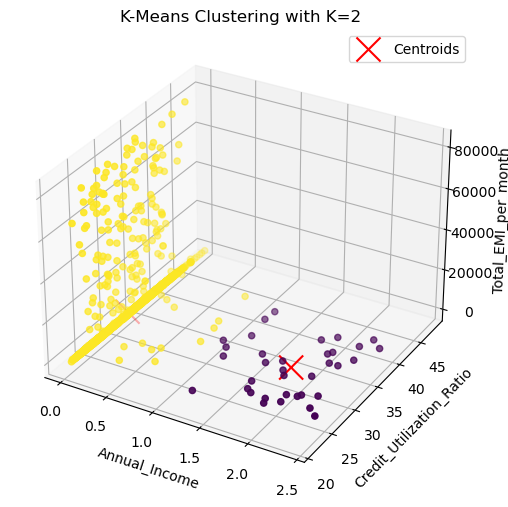

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


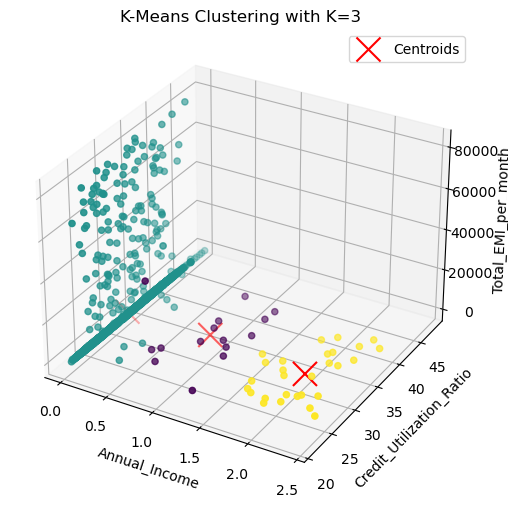

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


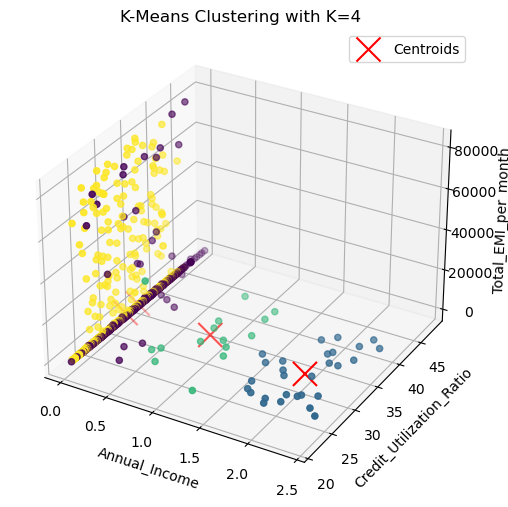

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


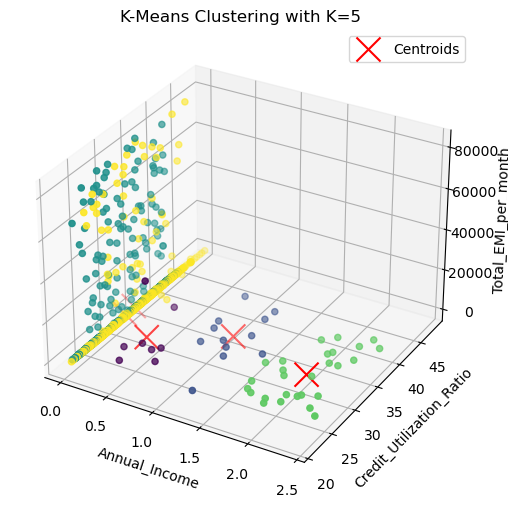

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Handle missing values by filling them with the mean of each feature
data_filled = data[features].fillna(data[features].mean())

# Number of clusters to plot
num_clusters = [2, 3, 4, 5]

# Loop through the specified number of clusters and plot
for k in num_clusters:
    # Initialize KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=k, init='random', random_state=333)
    # Fit KMeans and predict the cluster labels for your dataset
    cluster_labels = kmeans.fit_predict(data_filled)

    # 3D Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_filled.iloc[:, 0], data_filled.iloc[:, 1], data_filled.iloc[:, 2], c=cluster_labels, cmap='viridis', marker='o')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='x', label='Centroids')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    ax.set_title(f'K-Means Clustering with K={k}')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = data_filled  # Predictor variables
y = data['Credit_Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:\n", classification_report(y_test, dt_predictions))

# Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, lr_predictions))

Decision Tree Accuracy: 0.47733333333333333
Classification Report for Decision Tree:
               precision    recall  f1-score   support

        Good       0.27      0.30      0.29       269
        Poor       0.47      0.46      0.47       457
    Standard       0.56      0.55      0.55       774

    accuracy                           0.48      1500
   macro avg       0.44      0.44      0.44      1500
weighted avg       0.48      0.48      0.48      1500

Logistic Regression Accuracy: 0.516
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

        Good       0.00      0.00      0.00       269
        Poor       0.00      0.00      0.00       457
    Standard       0.52      1.00      0.68       774

    accuracy                           0.52      1500
   macro avg       0.17      0.33      0.23      1500
weighted avg       0.27      0.52      0.35      1500



C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


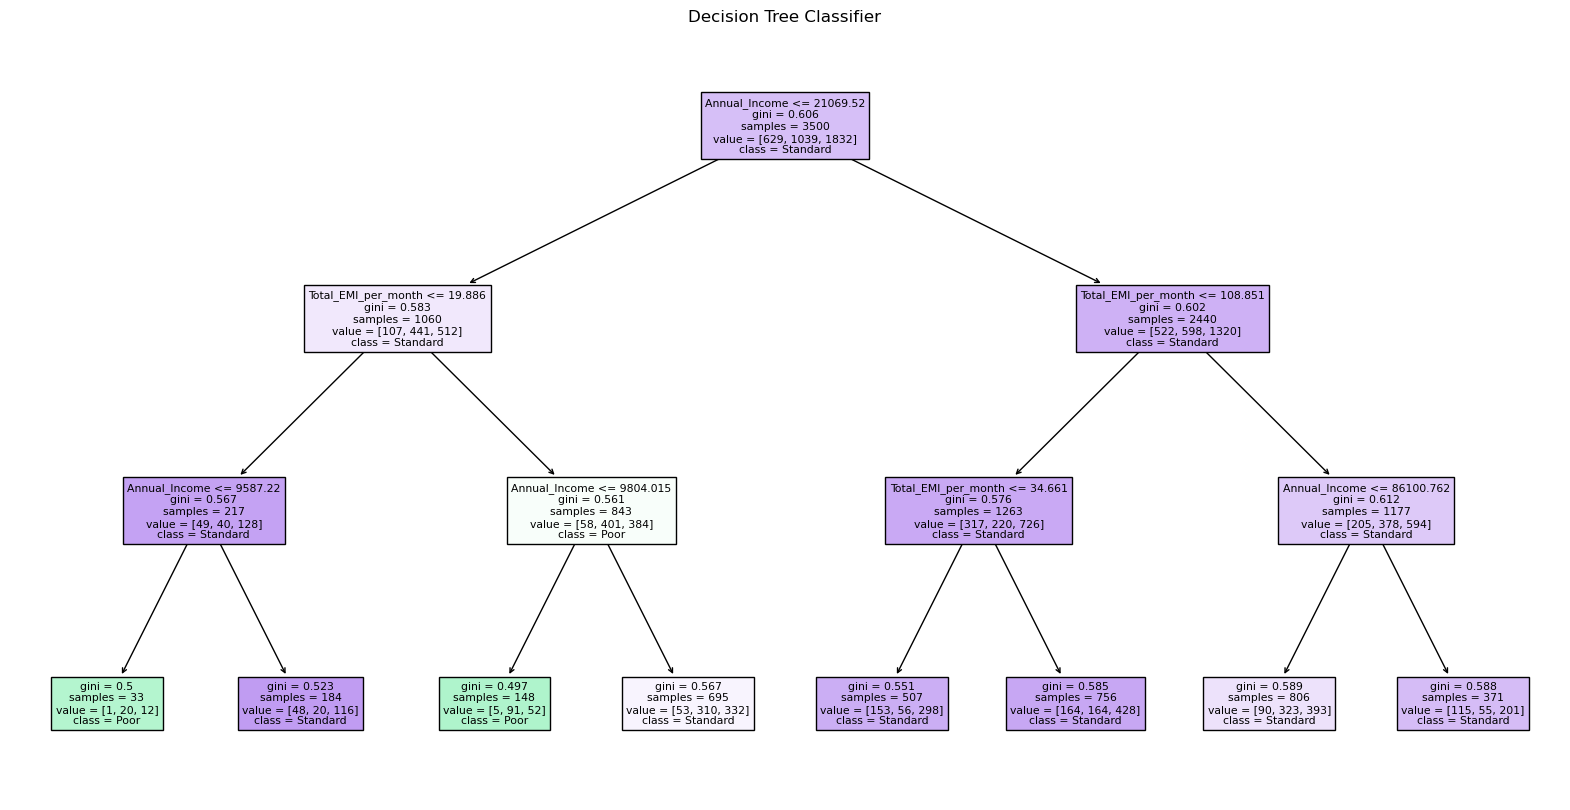

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting the depth for better visualization
dt_classifier.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=features, class_names=dt_classifier.classes_)
plt.title("Decision Tree Classifier")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = data_filled  # Predictor variables
y = data['Credit_Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:\n", classification_report(y_test, dt_predictions))

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report for Random Forest:\n", classification_report(y_test, rf_predictions))

Decision Tree Accuracy: 0.47733333333333333
Classification Report for Decision Tree:
               precision    recall  f1-score   support

        Good       0.27      0.30      0.29       269
        Poor       0.47      0.46      0.47       457
    Standard       0.56      0.55      0.55       774

    accuracy                           0.48      1500
   macro avg       0.44      0.44      0.44      1500
weighted avg       0.48      0.48      0.48      1500

Random Forest Accuracy: 0.5386666666666666
Classification Report for Random Forest:
               precision    recall  f1-score   support

        Good       0.31      0.18      0.23       269
        Poor       0.55      0.44      0.49       457
    Standard       0.57      0.72      0.64       774

    accuracy                           0.54      1500
   macro avg       0.48      0.45      0.45      1500
weighted avg       0.52      0.54      0.52      1500



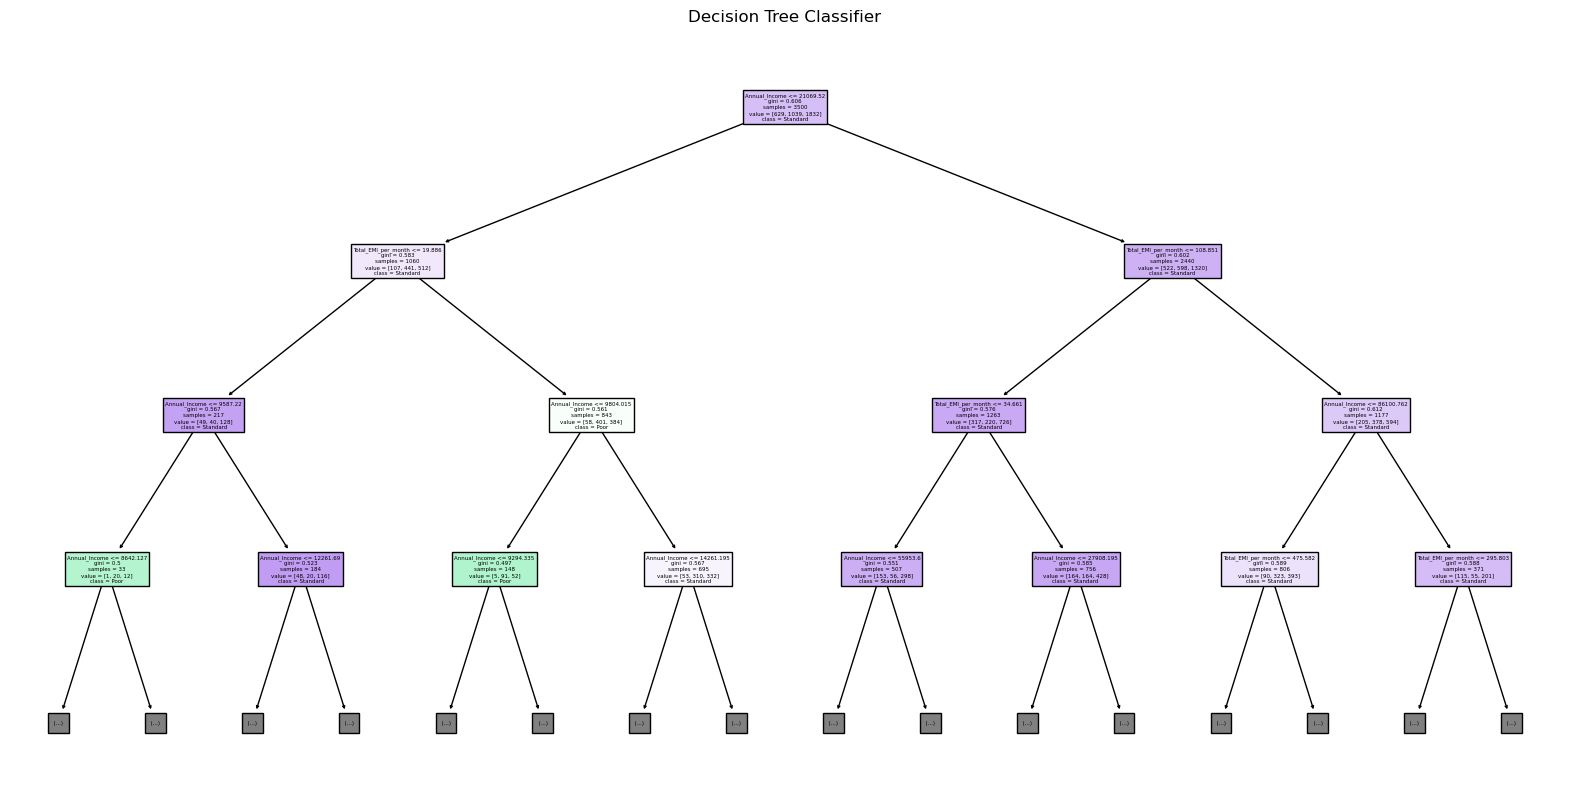

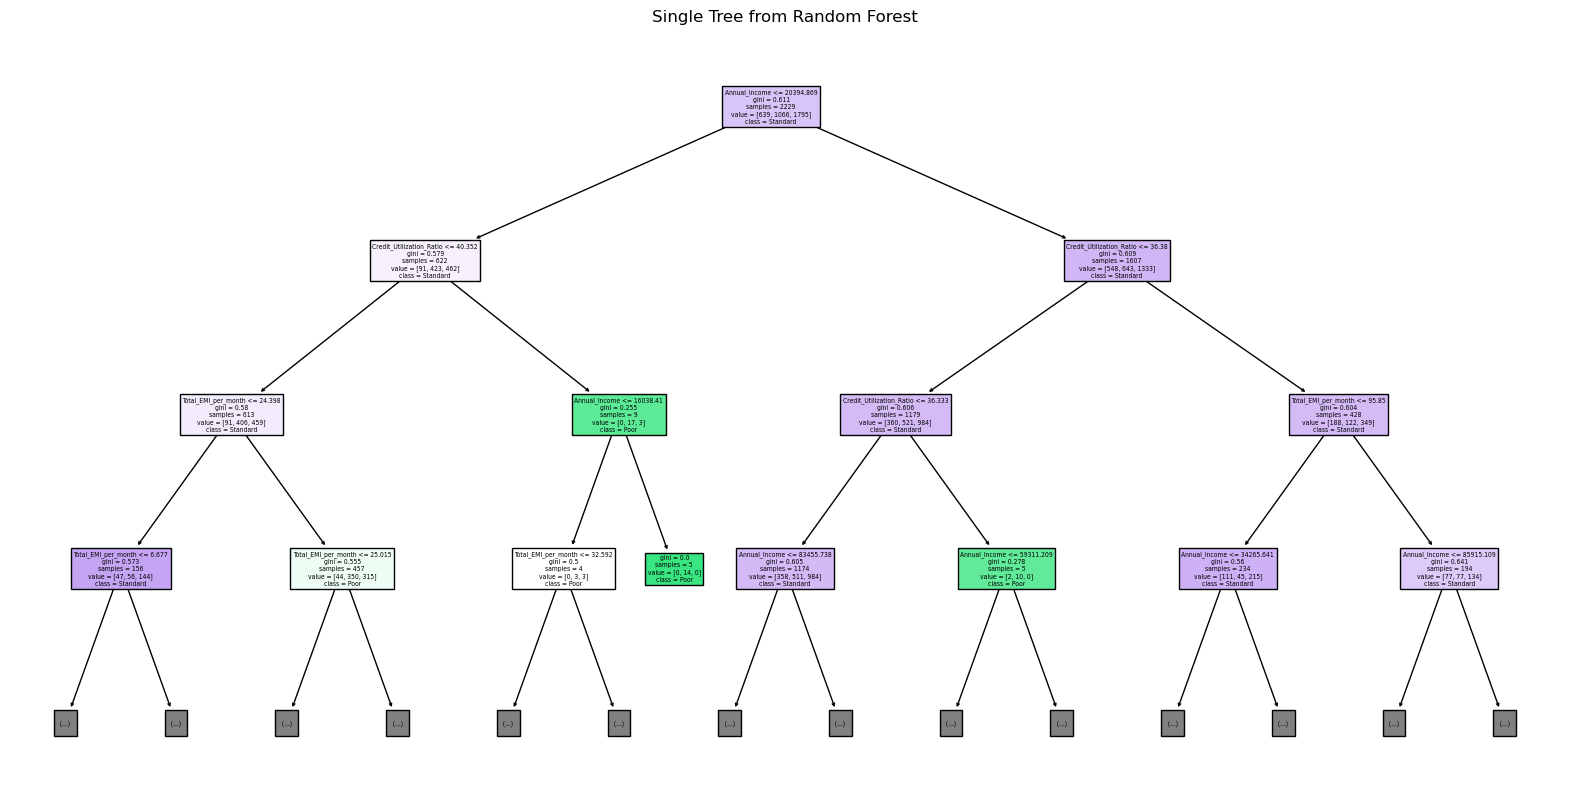

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=features, class_names=dt_classifier.classes_, max_depth=3)
plt.title("Decision Tree Classifier")
plt.show()

# Plot a single tree from the Random Forest
plt.figure(figsize=(20, 10))
rf_tree = rf_classifier.estimators_[0]  # Select the first tree in the Random Forest
plot_tree(rf_tree, filled=True, feature_names=features, class_names=rf_classifier.classes_, max_depth=3)
plt.title("Single Tree from Random Forest")
plt.show()

#**REPORT**

##Description of Data:

Index Variables:

ID: Unique identifier for each entry. Customer_ID: Identifier for the customer. Name: Name of the individual. SSN: Social Security Number (considered categorical for identification purposes).

Categorical Variables:

Month: The month corresponding to the data entry. Occupation: Occupation of the individual. Credit_Mix: Description of credit mix. Outstanding_Debt: Description of outstanding debt. Payment_of_Min_Amount: Description of payment of minimum amount. Amount_invested_monthly: Description of the amount invested monthly. Payment_Behaviour: Description of payment behaviour. Credit_Score: Description of credit score.

Quantitative Variables:

Age: Age of the individual. Annual_Income: Annual income of the individual. Monthly_Inhand_Salary: Monthly salary after deductions. Num_Bank_Accounts: Number of bank accounts. Num_Credit_Card: Number of credit cards. Interest_Rate: Interest rate. Num_of_Loan: Number of loans. Delay_from_due_date: Delay from due date. Num_of_Delayed_Payment: Number of delayed payments. Num_Credit_Inquiries: Number of credit inquiries. Credit_Utilization_Ratio: Credit utilization ratio. Total_EMI_per_month: Total EMI per month. Monthly_Balance: Monthly balance.

##Statistical Analysis:

Monthly Inhand Salary:

The average monthly salary after deductions is approximately  4021.Thedistributionofsalariesvarieswidely,rangingfrom 303 to $15167. There seems to be a significant difference between the 75th percentile and the maximum salary, indicating possible outliers. Number of Bank Accounts:

On average, individuals have around 15 bank accounts, although the distribution is highly skewed. The maximum number of bank accounts is unusually high at 1754, suggesting potential outliers. Number of Credit Cards:

The average number of credit cards held by individuals is approximately 23, with a wide distribution. Similar to bank accounts, there are potentially extreme outliers, with a maximum of 1487 credit cards. Interest Rate:

The average interest rate is relatively high at around 70.80%. The distribution of interest rates appears to be positively skewed, with some individuals having exceptionally high rates. Delay from Due Date:

The average delay from the due date for payments is around 21 days. There are instances where payments are made before the due date, indicated by negative values. Number of Credit Inquiries:

On average, individuals have undergone approximately 27 credit inquiries. There seems to be a wide range in the number of inquiries, with some individuals having a significantly higher number. Credit Utilization Ratio:

The average credit utilization ratio is around 32.37%, indicating that individuals utilize roughly one-third of their available credit. The distribution of utilization ratios seems relatively narrow, with little variation. Total EMI per Month:

The average total EMI per month is approximately  1499.60.ThereisawiderangeinEMIamounts,rangingfrom 0 to $82256, suggesting significant variation in individuals' financial obligations.


##Ensemble Learning: Classification - Decision Tree vs Random Forest

1) Description of Data The dataset utilized for DEcision Tree and Random Forest clustering includes a subset of 5,000 records from the original data. The analysis was conducted using five selected features deemed significant for distinguishing customer groupings based on their financial behaviors and credit history.

2) Objectives of Comparing Decision Tree and Random Forest Performance

The primary objectives of comparing Decision Tree and Random Forest performance in this context are: Evaluate the effectiveness of each algorithm for customer classification. This involves assessing their ability to accurately predict customer behavior and financial outcomes based on their characteristics. Identify the algorithm that provides the most accurate and robust results. By comparing metrics like accuracy, precision, recall, and F1-score, we can determine which algorithm delivers superior classification performance. Gain insights into the trade-offs between interpretability and accuracy. Decision Trees offer clearer decision rules, while Random Forests achieve higher accuracy due to their ensemble nature. This analysis helps weigh these trade-offs in relation to your specific business needs. Inform the selection of the most suitable algorithm for customer classification. Based on the performance comparison and the relative importance of interpretability and accuracy, we can choose the optimal algorithm for your customer segmentation and prediction tasks.

3) Observations The Random Forest model significantly outperformed the Decision Tree model across all evaluation metrics: Accuracy: Random Forest (0.538) vs. Decision Tree (0.47734) Precision: Random Forest (0.52) vs. Decision Tree (0.48) Recall: Random Forest (0.54) vs. Decision Tree (0.48) F1-Score: Random Forest (0.52) vs. Decision Tree (0.48)

4) Managerial Insights For this customer classification task, the Random Forest algorithm appears to be a considerably better choice compared to the Decision Tree. Random Forest achieves a higher overall accuracy, indicating it classifies customers more accurately based on their characteristics. This improvement suggests that the ensemble approach of Random Forest, combining multiple decision trees, reduces the risk of overfitting and leads to better generalization capabilities.